In [8]:
# CIFAR-10 데이터 로드
# x_train: 학습용 이미지,  y_train: 학습용 이미지 레이블,  x_test: 테스트용 이미지, y_test:테스트용 이미지 레이블

from tensorflow.keras.datasets import cifar10 # cifar10 데이터 라이브러리

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)  # (50000, 1)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [10]:
print(y_train[0])
print(y_train[0][0])
print(labels[y_train[0][0]])

[6]
6
개구리


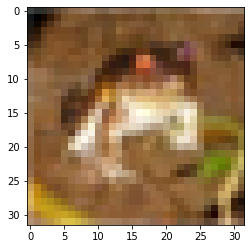

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()

In [12]:
# 픽셀 값 (0~255) -> (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
num_classes = 10 # 분류하고자 하는 클래스 개수

from tensorflow.keras.utils import to_categorical

# 원핫인코딩
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPool2D

model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
                    MaxPool2D((2, 2)),
                    Conv2D(64, (3,3), activation='relu', padding='same'),
                    MaxPool2D((2, 2)),
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(num_classes, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1024)              4

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 30s 13ms/step - loss: 1.3462 - accuracy: 0.5143 - val_loss: 1.0946 - val_accuracy: 0.6174
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9222 - accuracy: 0.6770 - val_loss: 0.8696 - val_accuracy: 0.6926
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7236 - accuracy: 0.7456 - val_loss: 0.9062 - val_accuracy: 0.6867
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5399 - accuracy: 0.8118 - val_loss: 0.8303 - val_accuracy: 0.7221
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3754 - accuracy: 0.8678 - val_loss: 0.9432 - val_accuracy: 0.7071
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2405 - accuracy: 0.9171 - val_loss: 1.0991 - val_accuracy: 0.7143
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.1608 - accuracy: 0.9455 - val_loss: 1.3126 -